In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('housing.csv')

In [3]:
data = data.fillna(0)

In [4]:
data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [47]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,13.022766,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,12.789687,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,12.771673,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,12.740520,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,12.743154,NEAR BAY


In [6]:
df = data.copy()

In [7]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
df = df[['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value',
'ocean_proximity']]

In [9]:
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
df['rooms_per_household'] = df['total_rooms']/df['households']
df['bedrooms_per_room'] = df['total_bedrooms']/df['total_rooms']
df['population_per_household'] = df['population']/df['households']

In [11]:
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


In [48]:
#Q1
df['ocean_proximity'].mode()

0    <1H OCEAN
Name: ocean_proximity, dtype: object

In [13]:
df.dtypes

latitude                    float64
longitude                   float64
housing_median_age          float64
total_rooms                 float64
total_bedrooms              float64
population                  float64
households                  float64
median_income               float64
median_house_value          float64
ocean_proximity              object
rooms_per_household         float64
bedrooms_per_room           float64
population_per_household    float64
dtype: object

In [14]:
numerical = [
            'latitude',
            'longitude',
            'housing_median_age',
            'total_rooms',
            'total_bedrooms',
            'population',
            'households',
            'median_income',
            ]

categorical = ['ocean_proximity']

In [15]:
corr_matrix = df[numerical].corr()

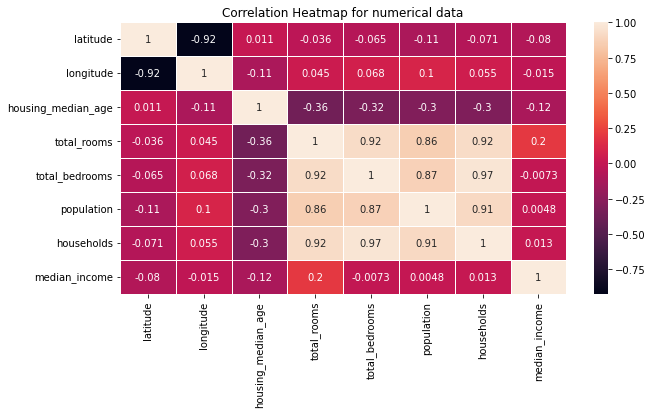

In [16]:
#Q2
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, linewidths=.6)
plt.title('Correlation Heatmap for numerical data')
plt.show()

In [17]:
corr_matrix.unstack().sort_values(ascending = False).head(12)

latitude            latitude              1.000000
longitude           longitude             1.000000
households          households            1.000000
population          population            1.000000
total_bedrooms      total_bedrooms        1.000000
total_rooms         total_rooms           1.000000
housing_median_age  housing_median_age    1.000000
median_income       median_income         1.000000
households          total_bedrooms        0.966507
total_bedrooms      households            0.966507
total_rooms         total_bedrooms        0.920196
total_bedrooms      total_rooms           0.920196
dtype: float64

In [18]:
avg_median_house_value = df.median_house_value.mean()

In [19]:
df['median_house_value'] = np.where(df['median_house_value'] >= avg_median_house_value, 1, 0)

In [20]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [21]:
df_train, df_val = train_test_split (df_full_train, test_size=0.25, random_state=1)

In [22]:
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values
y_full_train = df_full_train.median_house_value.values

In [23]:
#Q3
round(mutual_info_score(df_train.median_house_value, df_train.ocean_proximity),2)

0.1

In [24]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']
del df_full_train ['median_house_value']

In [25]:
#Q4
dv = DictVectorizer(sparse=False)

In [26]:
train_dicts = (df_train[categorical + numerical]).to_dict(orient='records')
train_dicts[0]

{'ocean_proximity': 'INLAND',
 'latitude': 34.63,
 'longitude': -118.18,
 'housing_median_age': 19.0,
 'total_rooms': 3562.0,
 'total_bedrooms': 606.0,
 'population': 1677.0,
 'households': 578.0,
 'median_income': 4.1573}

In [27]:
X_train = dv.fit_transform(train_dicts)
X_train

array([[ 578.  ,   19.  ,   34.63, ..., 1677.  ,  606.  , 3562.  ],
       [  50.  ,   10.  ,   34.69, ...,  108.  ,  102.  ,  337.  ],
       [ 462.  ,   27.  ,   33.78, ..., 1723.  ,  491.  , 1672.  ],
       ...,
       [ 854.  ,   18.  ,   33.9 , ..., 2276.  ,  922.  , 3380.  ],
       [ 415.  ,   41.  ,   36.78, ..., 1129.  ,  462.  , 2227.  ],
       [ 589.  ,    9.  ,   34.02, ..., 2280.  ,  587.  , 4265.  ]])

In [28]:
val_dicts = (df_val[categorical + numerical]).to_dict(orient='records')

In [29]:
X_val = dv.transform(val_dicts)

In [30]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [31]:
y_pred = (model.predict_proba(X_val)[:,1]).astype(int)

In [32]:
y_val

array([1, 1, 0, ..., 1, 1, 0])

In [33]:
round((y_val == y_pred).mean(),2)

0.58

In [34]:
accuracy = np.round(accuracy_score(y_val, y_pred),2)
accuracy

0.58

In [35]:
#Q5
features = numerical + categorical
features

['latitude',
 'longitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity']

In [36]:
orig_score = accuracy

for c in features:
    subset = features.copy()
    subset.remove(c)
    
    train_dict = df_train[subset].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    
    X_train = dv.fit_transform(train_dict)
    
    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    val_dict = df_val[subset].to_dict(orient='records')
    
    X_val = dv.transform(val_dict)
    
    y_pred =model.predict(X_val)
    
    score = accuracy_score(y_val, y_pred)
    
    print(c, orig_score-score, score)

latitude -0.2417054263565892 0.8217054263565892
longitude -0.2395251937984496 0.8195251937984496
housing_median_age -0.23976744186046517 0.8197674418604651
total_rooms -0.24340116279069768 0.8234011627906976
total_bedrooms -0.2438856589147287 0.8238856589147286
population -0.22038759689922482 0.8003875968992248
households -0.2358914728682171 0.8158914728682171
median_income -0.19325581395348845 0.7732558139534884
ocean_proximity -0.2252325581395349 0.8052325581395349


In [37]:
#Q6
data['median_house_value']

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [38]:
data['median_house_value'] = np.log1p(data.median_house_value)

In [39]:
data['median_house_value']

0        13.022766
1        12.789687
2        12.771673
3        12.740520
4        12.743154
           ...    
20635    11.265758
20636    11.252872
20637    11.432810
20638    11.346883
20639    11.400887
Name: median_house_value, Length: 20640, dtype: float64

In [40]:
data[data['total_bedrooms'].isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [41]:
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=1) 

In [42]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1) 

In [43]:
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

In [44]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [45]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
    
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')

X_val = dv.transform(val_dict)

In [46]:
for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    print (a, round((score),3))

0 0.531
0.01 0.531
0.1 0.531
1 0.531
10 0.531
